In [10]:
!conda install SMOTEENN

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - smoteenn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os

data_path = "coin/preprocessed/days/days_2_0_1_4_2_12_.csv"
df=pd.read_csv(data_path)



# 데이터셋의 X와 y가 있다고 가정
# X는 특성(feature), y는 타겟(label) 데이터
X = df.drop('y', axis=1)
y = df['y']

# _X_train, _X_val, _y_train, _y_val = train_test_split(X, y, test_size=0.1, random_state=42)
boundary = int(len(df)*0.8)
_X_train = X.loc[:boundary]
_y_train = y.loc[:boundary]
_X_val = X.loc[boundary:]
_y_val = y.loc[boundary:]
print("1비율",(_y_train==1).mean(), (_y_val==1).mean())

from imblearn.combine import SMOTEENN

sampler_train = SMOTEENN(sampling_strategy=0.5, random_state=42) 
X_train, y_train = sampler_train.fit_resample(_X_train, _y_train)
sampler_val = SMOTEENN(sampling_strategy=0.5, random_state=43) 
X_val, y_val = sampler_val.fit_resample(_X_val, _y_val)

print("1비율",(y_train==1).mean(), (y_val==1).mean())

1비율 0.025174375532911197 0.023539278725188705
1비율 0.3686212464374343 0.36343143926505617


In [2]:
EST = 100
DEP = 18

data_name = os.path.splitext(os.path.basename(data_path))[0]
model_name = f"model_{EST}_{DEP}_"+data_name

# 랜덤 포레스트 학습
model = RandomForestClassifier(n_estimators=EST, max_depth=DEP, random_state=1)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.7733072473630487

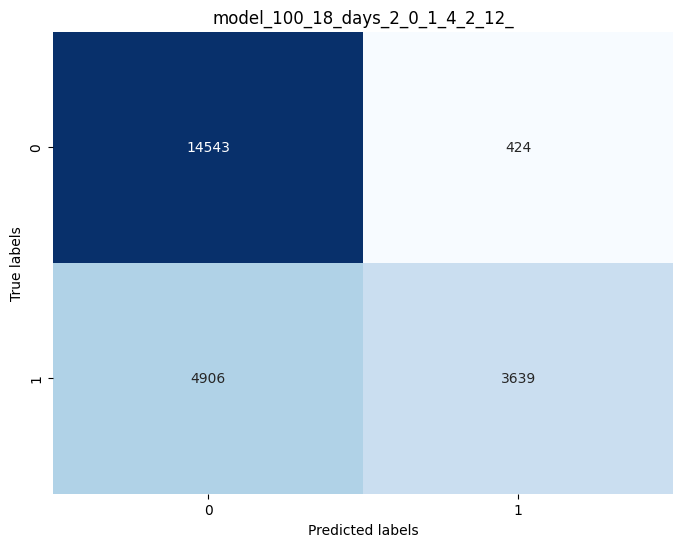

model_100_18_days_2_0_1_4_2_12_ , 14543 , 424 , 4906 , 3639


In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 테스트 데이터로 예측
y_pred = model.predict(X_val)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_val, y_pred)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(model_name)
plt.show()
print(model_name,',',conf_matrix[0][0],',',conf_matrix[0][1],',',conf_matrix[1][0],',',conf_matrix[1][1])

In [4]:
from joblib import dump, load

dump(model, "coin/model/"+model_name+".pkl")

['coin/model/model_100_18_days_2_0_1_4_2_12_.pkl']